<a href="https://colab.research.google.com/github/maidyjoshi/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 10
## TRESHOLDING

Nama  : Maidy Putri Joshi

NIM   : 2141720060

Kelas : TI-3F



In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
pip install pytesseract

Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [19]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas

In [14]:
import cv2 as cv
filename = ('/content/drive/MyDrive/SEMESTER5/PCVK/dataset/gradient.jpg')
img = cv.imread (filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
_, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY) #tanpa library

#2. thresh2 adalah binary threshold inverse
thresh2 = cv.bitwise_not(thresh1)

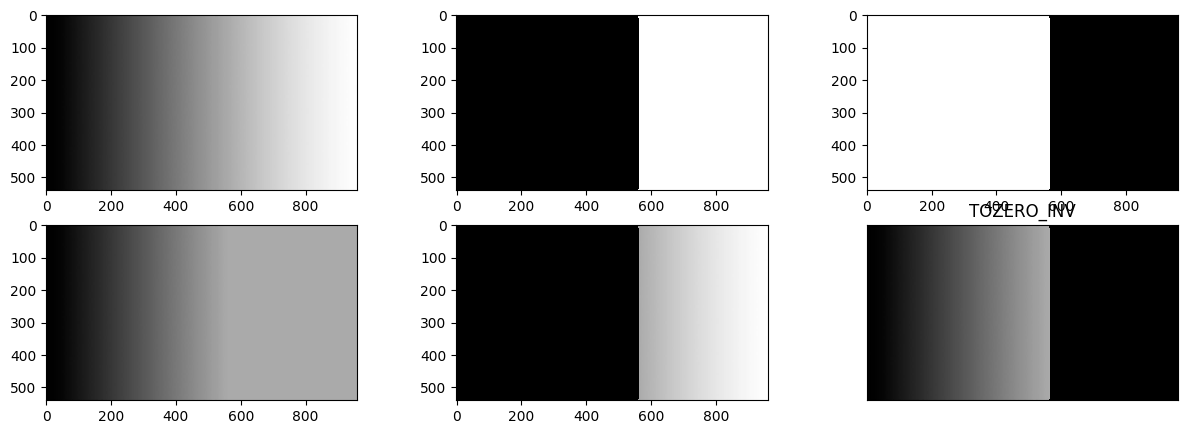

In [16]:
#3. Threshold Truncate
thresh3[img>thresh] = thresh # tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 # tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 # tanpa library
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)): plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
plt.title(titles[i])
plt.xticks([]),plt.yticks([])
plt.show()


Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

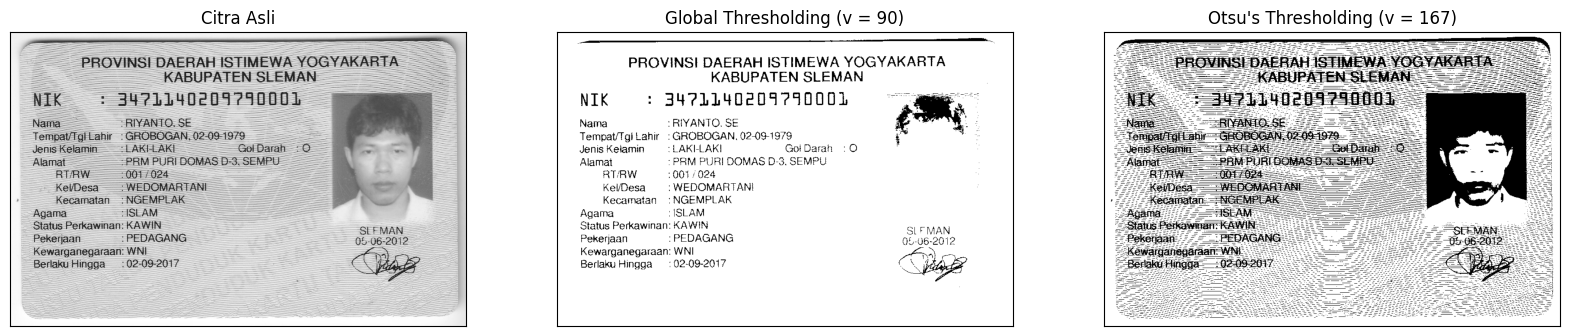

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png')
img = cv.imread(filename, 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number

    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in bins[1:-1]:  # This goes from 1 to 254 uint8 range
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)

        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = np.zeros_like(gray)
    final_img[gray > final_thresh] = 255

    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"
ret, th1 = cv.threshold(img, 90, 255, cv.THRESH_BINARY)
# ret, th2 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [img, th1, otsu_biner]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i+1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

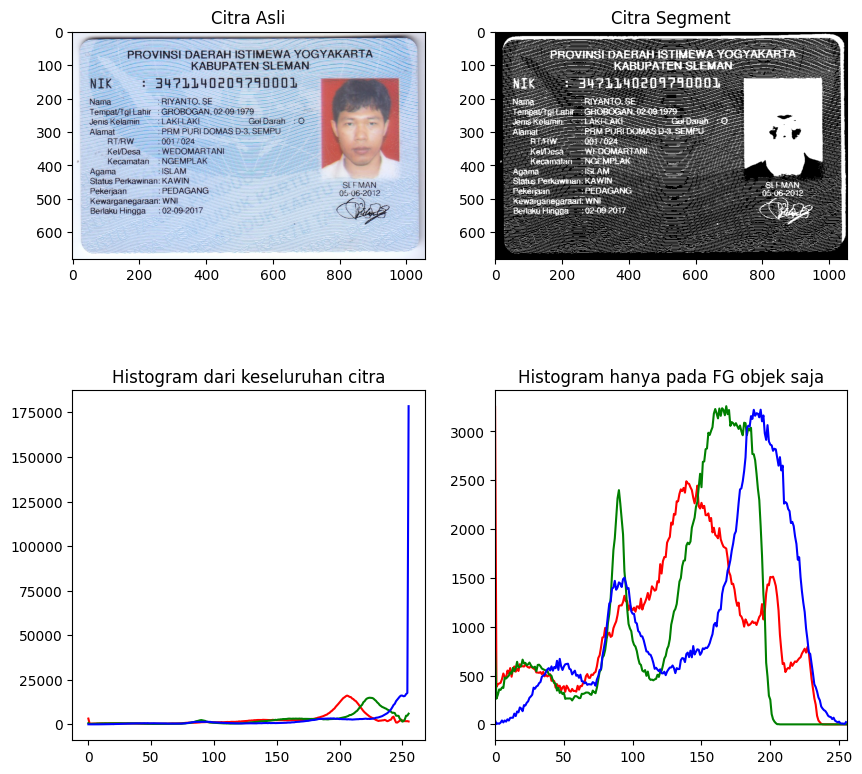

In [22]:
filename = ('/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7d7bc4661ae0>)

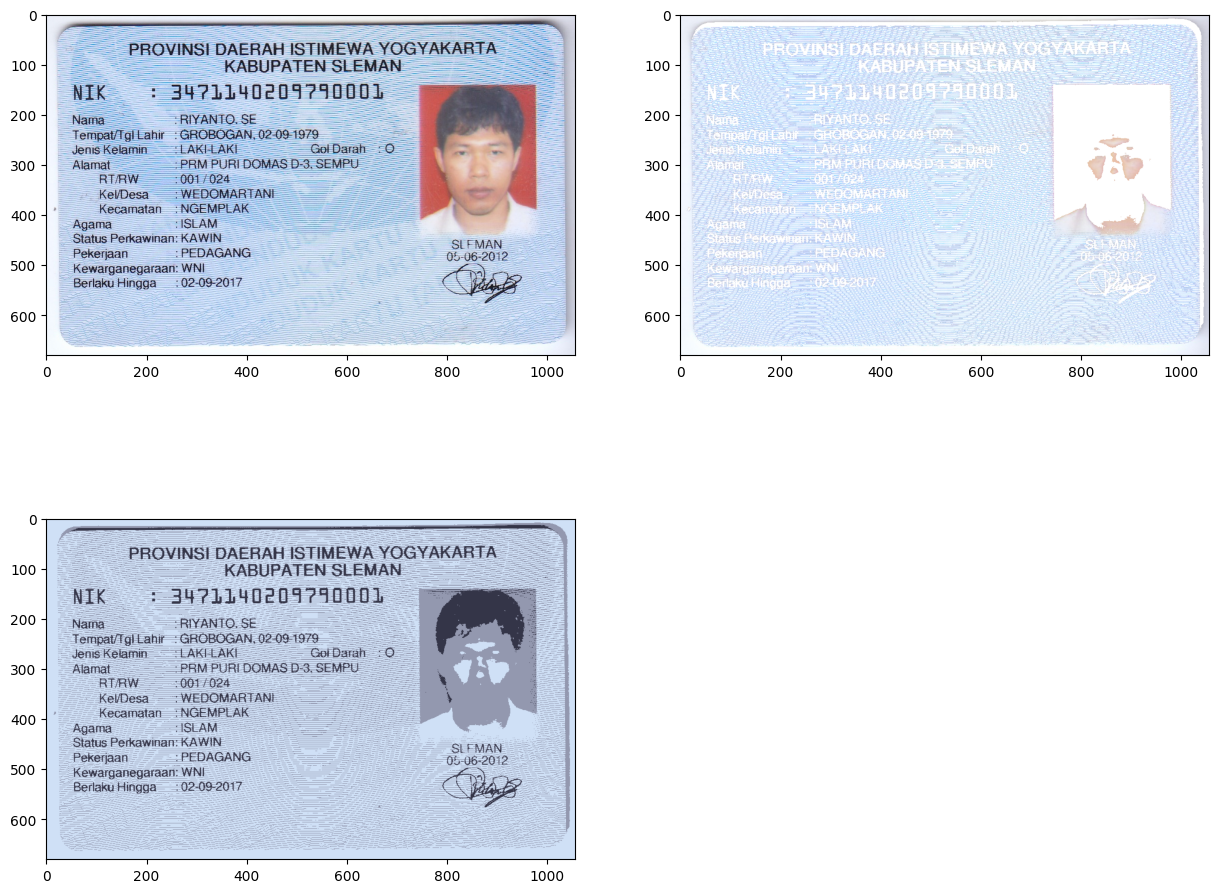

In [24]:
Filename = ('/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta
array 2D sebagai masukan, sedangkan image aslinya adalah
array 3D
selanjutnya kita perlu melakukan flattening array image
masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid
sudah tidak terlalu banyak pergeseran posisi antara
interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data
yang besar, maka kita akan hentikan iterasi saat jumlah
iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn
posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS +
cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama
(hijau, biru, dan putih/orange). untuk percobaan ini kita
akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None,
criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali
tulisan.

Install PIP OCR

In [25]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (10.4 MB/s)
debconf: unable to init

Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()


In [27]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [73]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/SEMESTER5/PCVK/ktp3.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Menambahkan kotak untuk deteksi teksi pada gambar

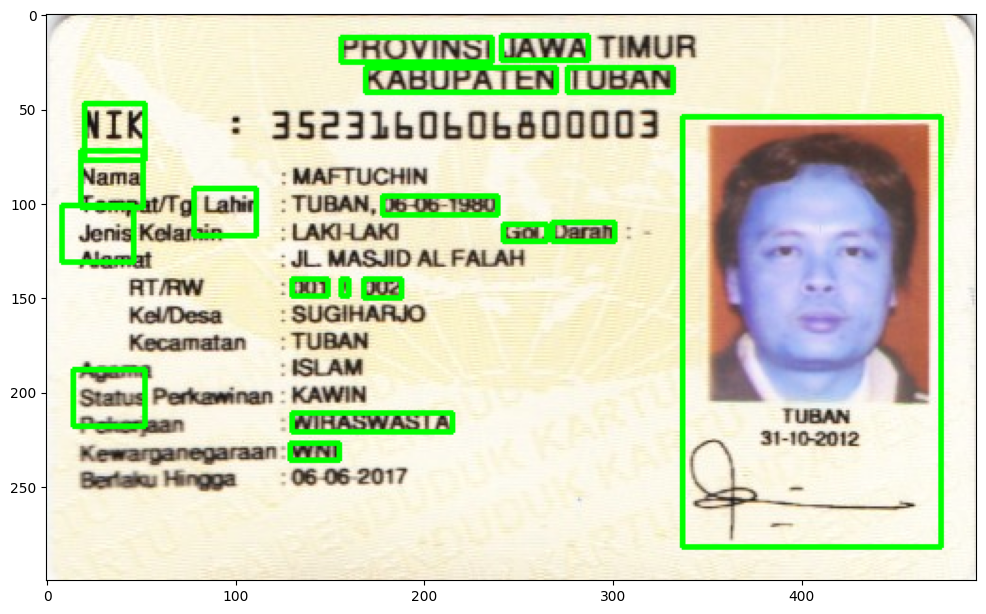

In [74]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
      (x, y, w, h) = (d['left'][i], d['top'][i],
d['width'][i], d['height'][i])
      img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2)
display(img)

Hasil pembacaan KTP Menjadi text

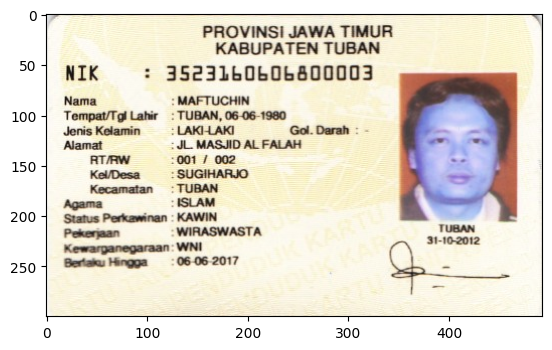

PROVINSI JAWA TIMUR
KABUPATEN TUBAN

NIK: 3523150404800003
Nama MArTUCHIN
Tompat/Tgi Lahir TUBAN, 05.06 1980
Jenis Kolamin LAKI LAKI Got Daran
Mamat IL MASJID AL FALAH
BTAW 0011 002
KolDesa — SUGIHARIO 5 8
Kecamatan — TUBAN
ISLAM 8 Y
Kawi

 

WIRASWASTA tuBAN
kewarganegaraan WNI — Arweoi

Berak Hungga 06 06 2017

 



In [75]:
img = cv2.imread('/content/drive/MyDrive/SEMESTER5/PCVK/ktp3.png')
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()


Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan
GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat
pada KTP

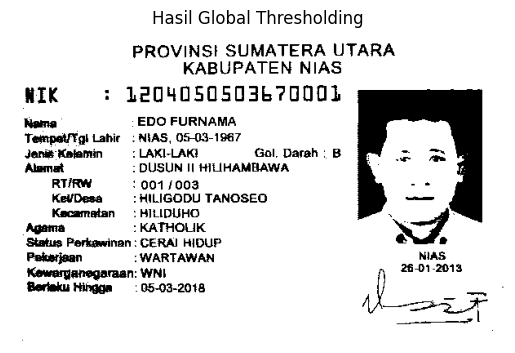

In [61]:
import cv2
from matplotlib import pyplot as plt

# Membaca gambar KTP
img = cv2.imread('/content/drive/MyDrive/SEMESTER5/PCVK/ktp5.png', 0)  # Baca dalam mode grayscale

# Lakukan Global Thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)



# Tampilkan gambar setelah thresholding
plt.imshow(thresh, cmap='gray')
plt.title('Hasil Global Thresholding')
plt.axis('off')
plt.show()

In [62]:
import pytesseract

# Konversi hasil thresholding ke format yang bisa dibaca Tesseract (dalam bentuk string)
text = pytesseract.image_to_string(thresh)

# Tampilkan teks yang terbaca
print("Teks yang terbaca dari KTP 1:")
print(text)

Teks yang terbaca dari KTP 1:
PROVINS! SUMATERA UTARA
KABUPATEN NIAS

NIK t 4204050503b670001

Rama EDO FURNAMA
‘Tempat¥gi Lahie : NIAS, 05-03-1967

 

 

denis Kofamin KI-LAK Gol, Darah | B
‘Alomat USUN II HILIHAMBAWA.
RTIRW 001 4003
KevDesa —: HILIGODU TANOSEO
Kecamatan =: HILIDUHO
Agama : KATHOUK
‘Status Perkawinan : CERAI HIDUP
Pekerjean :WARTAWAN

‘Kewerganegaraan: WNi
Berielu Hingga 05-03-2018

 

